In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf


In [2]:
A = np.array([3.0, 2.0])

x = np.arange(0,10,0.1)
ones_column = np.ones((x.shape[0],1), dtype= np.float32)
x_np =  np.column_stack((x, ones_column))
y_np = np.dot(x_np, A) + np.random.normal(0, 0.9, 100)

In [3]:
x_np.shape
print(y_np.shape)

(100,)


In [4]:
tf.reset_default_graph()
sess = tf.Session()
x_tensor = tf.constant(x_np)
y_tensor = tf.constant(y_np, shape = [y_np.shape[0],1])

In [5]:
xt_x = tf.matmul(tf.transpose(x_tensor), x_tensor)
xt_x_inv = tf.matrix_inverse(xt_x)
product = tf.matmul(xt_x_inv, tf.transpose(x_tensor))
solution = tf.matmul(product, y_tensor)
A_pred = sess.run(solution)

In [6]:
A_pred

array([[ 3.05861805],
       [ 1.83375255]])

slope: 3.05861804758
y_intercept: 1.8337525521


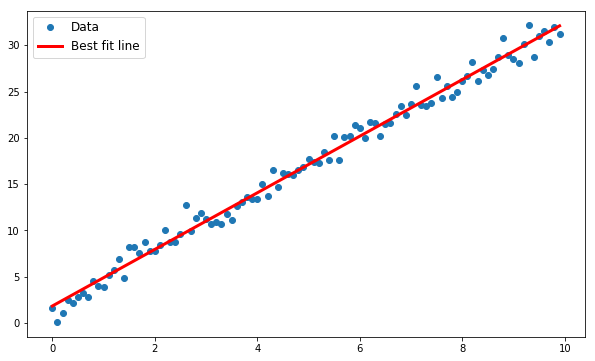

In [8]:
slope = A_pred[0][0]
y_intercept = A_pred[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

best_fit = np.matmul(x_np, A_pred)
plt.figure(figsize=[10,6])
plt.plot(x, y_np, 'o', label='Data')
plt.plot(x, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left', fontsize='large')
plt.show()